In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from time import process_time
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency

In [2]:
hr_df = pd.read_csv('datasets\hr\hr_comma_sep.csv')

In [3]:
print(hr_df.shape)
print(hr_df.columns)
print(hr_df.info())

(14999, 10)
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), ob

In [4]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
print(hr_df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [6]:
dupes = hr_df.duplicated()
print(dupes.sum())
hr_df[dupes]

3008


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
hr_df.drop_duplicates(inplace=True)
dupeCheck = hr_df.duplicated()
print(dupeCheck.sum(), hr_df.shape)

0 (11991, 10)


In [8]:
def plotCount(df, column):
    plt.figure()
    plt.xticks(rotation=45)
    sns.countplot(x=column, data=df)

In [9]:
def plotMultipleCount(df):
    for column in df:
        plt.figure()
        plt.xticks(rotation=45)
        sns.countplot(x=column, data=df)

In [10]:
nonCategoricalcolumns = ['satisfaction_level', 'last_evaluation', 'average_montly_hours']
hrCategorical_df = hr_df[hr_df.columns.difference(nonCategoricalcolumns)]
hrCategorical_df.columns

Index(['Department', 'Work_accident', 'left', 'number_project',
       'promotion_last_5years', 'salary', 'time_spend_company'],
      dtype='object')

In [11]:
hr_df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

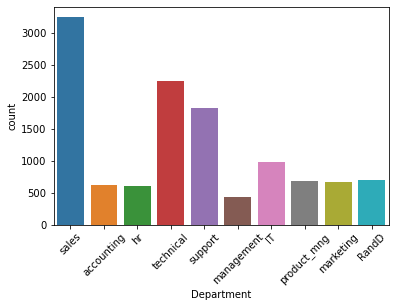

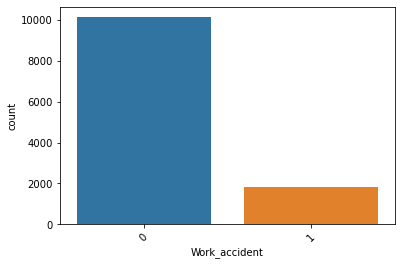

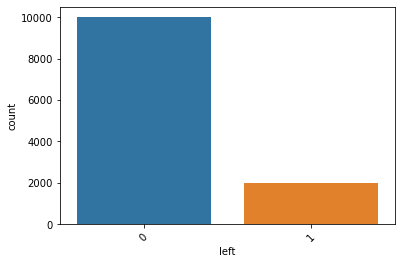

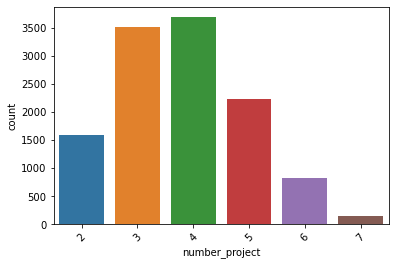

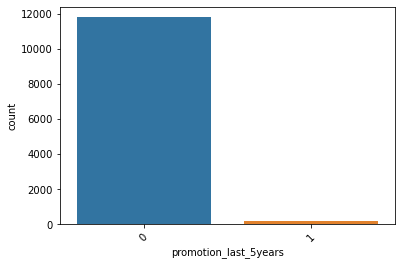

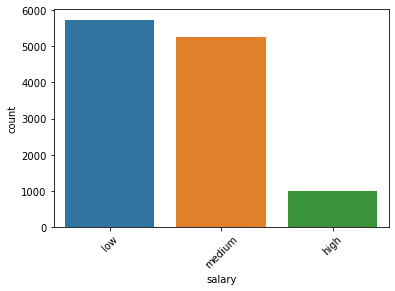

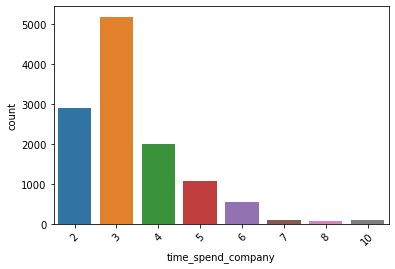

In [12]:
plotMultipleCount(hrCategorical_df)

In [13]:
def categoricalPercentage(df, column, maxRow):
    categoricalPercent = {}
    for key, value in df[column].value_counts().to_dict().items():
        categoricalPercent[key] = value/maxRow
    print(categoricalPercent)

In [14]:
categoricalPercentage(hr_df, 'time_spend_company', 11991)

{3: 0.4328246184638479, 2: 0.24268201150863147, 4: 0.16720873988824952, 5: 0.08856642481861396, 6: 0.04520056709198566, 10: 0.00892335918605621, 7: 0.0078392127428905, 8: 0.006755066299724793}


{3: 0.4328246184638479, 2: 0.24268201150863147, 4: 0.16720873988824952, 5: 0.08856642481861396, 6: 0.06871820532065716}
None


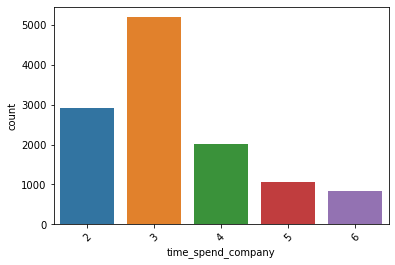

In [15]:
hr_df['time_spend_company'] = hr_df['time_spend_company'].replace([7,8,10], 6)
print(categoricalPercentage(hr_df, 'time_spend_company', 11991))
plotCount(hr_df, 'time_spend_company')

<AxesSubplot:xlabel='time_spend_company', ylabel='satisfaction_level'>

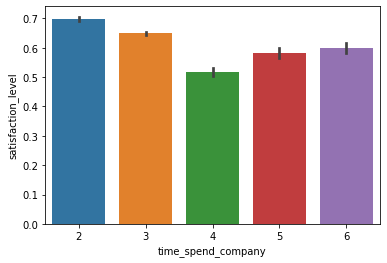

In [16]:
sns.barplot(data=hr_df, x="time_spend_company", y="satisfaction_level")

# Bivariate Analysis

In [17]:
def contingencyHeatmap(contingency, fmt=''):
    return(sns.heatmap(contingency, annot=True, fmt=fmt))

In [18]:
def createContingencyTable(df, x, y,order = None, normalize = False):
    global contingency
    if normalize:
        contingency = pd.crosstab(df[x], df[y], normalize = 'index')
        if order is not None:
            contingency = contingency[order]
        return(contingency, contingencyHeatmap(contingency, '.2%'))
    else:
        contingency = pd.crosstab(df[x], df[y])
    if order is not None:
        contingency = contingency[order]
    return(contingency, contingencyHeatmap(contingency, 'd'))

In [19]:
salaryOrder = ['low', 'medium', 'high']

(salary               low  medium  high
 time_spend_company                    
 2                   1374    1278   258
 3                   2519    2252   419
 4                    986     869   150
 5                    550     455    57
 6                    311     407   106,
 <AxesSubplot:xlabel='salary', ylabel='time_spend_company'>)

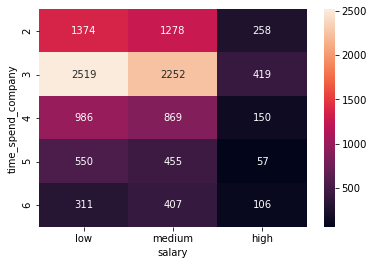

In [20]:
createContingencyTable(hr_df, 'time_spend_company', 'salary', salaryOrder)

(salary                   low    medium      high
 time_spend_company                              
 2                   0.472165  0.439175  0.088660
 3                   0.485356  0.433911  0.080732
 4                   0.491771  0.433416  0.074813
 5                   0.517891  0.428437  0.053672
 6                   0.377427  0.493932  0.128641,
 <AxesSubplot:xlabel='salary', ylabel='time_spend_company'>)

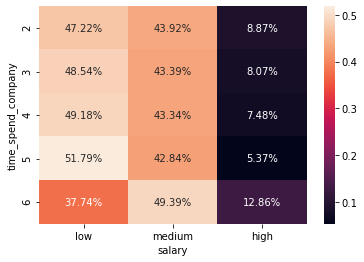

In [21]:
createContingencyTable(hr_df, 'time_spend_company', 'salary', salaryOrder, True)

In [22]:
c, p, dof, expected = chi2_contingency(contingency) 
print("%.16f" % p)

0.9999999497423644


(time_spend_company     2     3     4    5    6
 left                                          
 0                   2879  4316  1510  580  715
 1                     31   874   495  482  109,
 <AxesSubplot:xlabel='time_spend_company', ylabel='left'>)

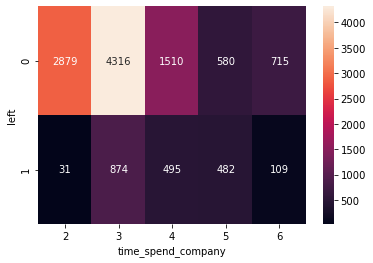

In [23]:
createContingencyTable(hr_df, 'left','time_spend_company', )

(time_spend_company        2         3         4         5         6
 left                                                               
 0                   0.28790  0.431600  0.151000  0.058000  0.071500
 1                   0.01557  0.438975  0.248619  0.242089  0.054746,
 <AxesSubplot:xlabel='time_spend_company', ylabel='left'>)

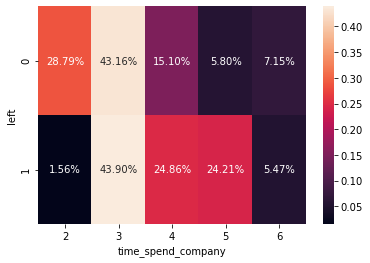

In [24]:
createContingencyTable(hr_df, 'left', 'time_spend_company',None,True)

In [25]:
c, p, dof, expected = chi2_contingency(contingency) 
print("%.16f" % p)

0.9838096025031575


(left           0         1
 salary                    
 high    0.951515  0.048485
 low     0.795470  0.204530
 medium  0.853830  0.146170,
 <AxesSubplot:xlabel='left', ylabel='salary'>)

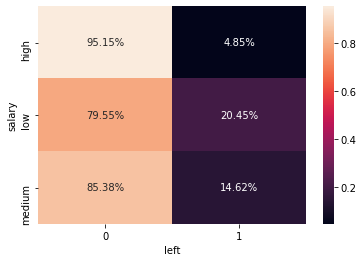

In [26]:
createContingencyTable(hr_df, 'salary', 'left', None , True)

In [27]:
c, p, dof, expected = chi2_contingency(contingency) 
print("%.16f" % p)

0.9475377634387323


(Department   IT  RandD  accounting   hr  management  marketing  product_mng  \
 salary                                                                        
 high         71     47          63   38         128         62           52   
 low         476    322         296  296         139        310          343   
 medium      429    325         262  267         169        301          291   
 
 Department  sales  support  technical  
 salary                                 
 high          237      126        166  
 low          1553      867       1138  
 medium       1449      828        940  ,
 <AxesSubplot:xlabel='Department', ylabel='salary'>)

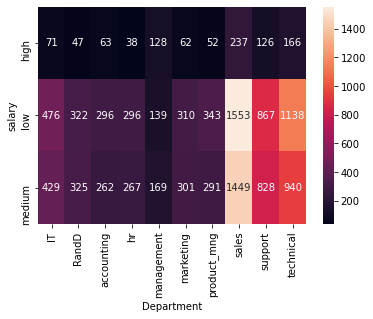

In [28]:
createContingencyTable(hr_df, 'salary', 'Department')

In [29]:
c, p, dof, expected = chi2_contingency(contingency) 
print("%.16f" % p)

0.0000000000000000


## Feature Encoding

In [30]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [31]:
def targetEncoding(df, column, target, rename):
    xTarget = target+'_x'
    yTarget = target+'_y'
    encodings = df.groupby(column)[target].mean().reset_index()
    df = df.merge(encodings, how=target, on=column)
    df.rename(columns = {yTarget: rename, xTarget:target}, inplace = True)
    return df

In [32]:
hr_df = targetEncoding(hr_df, 'Department', 'left', 'target_Department')

In [33]:
hr_df = targetEncoding(hr_df, 'number_project', 'left', 'target_number_project')

In [34]:
hr_df = targetEncoding(hr_df, 'time_spend_company', 'left', 'target_time_spend_company')

In [35]:
hr_df = targetEncoding(hr_df, 'salary', 'left', 'target_salary')

In [36]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'target_Department',
       'target_number_project', 'target_time_spend_company', 'target_salary'],
      dtype='object')

In [37]:
targetColumns = ['Department', 'number_project', 'time_spend_company', 'salary' ]
hrReady_df = hr_df[hr_df.columns.difference(targetColumns)]
hrReady_df.columns

Index(['Work_accident', 'average_montly_hours', 'last_evaluation', 'left',
       'promotion_last_5years', 'satisfaction_level', 'target_Department',
       'target_number_project', 'target_salary', 'target_time_spend_company'],
      dtype='object')

In [38]:
X,y = hrReady_df.iloc[:,hrReady_df.columns != 'left'], hrReady_df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [39]:
xgboost_model = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=6, subsample = 0.7, objective= 'binary:logistic', 
                              use_label_encoder=False, eval_metric = 'logloss')
xgboost_model.fit(X_train, y_train)
xgboost_predictions = xgboost_model.predict(X_test)
print(classification_report(y_test, xgboost_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.88      0.92       401

    accuracy                           0.98      2399
   macro avg       0.97      0.94      0.95      2399
weighted avg       0.98      0.98      0.98      2399



In [40]:
xgb_scores = []
xgb_recalls = []
xgb_precisions = []
kf = KFold(10, True)
temp_cv_scores = []
for train, test in kf.split(X):
    X_train, X_test = X.values[train], X.values[test]
    y_train, y_test = y.values[train], y.values[test]
    xgboost_model.fit(X_train, y_train)
    y_pred = xgboost_model.predict(X_test)
    precision, recall, fscore, support = score(y_pred, y_test)
    xgb_scores.append(fscore)
    xgb_recalls.append(recall)
    xgb_precisions.append(precision)
print('Score:', sum(xgb_scores) / len(xgb_scores), 'Recall:', sum(xgb_recalls) / len(xgb_recalls), 
      'Precision:', sum(xgb_precisions) / len(xgb_precisions))

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Score: [0.98856336 0.94031207] Recall: [0.98310813 0.96887907] Precision: [0.99408813 0.91366113]


In [41]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', TP)
print('\nTrue Negatives(TN) = ', TN )
print('\nFalse Positives(FP) = ', FP)
print('\nFalse Negatives(FN) = ', FN )

Confusion matrix

 [[985   7]
 [ 20 187]]

True Positives(TP) =  985

True Negatives(TN) =  187

False Positives(FP) =  7

False Negatives(FN) =  20


In [42]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall : {0:0.4f}'.format(recall))
f1score = 2 *( (precision * recall)/ (precision + recall))
print('F1-score : {0:0.4f}'.format(f1score))

Precision : 0.9929
Recall : 0.9801
F1-score : 0.9865


In [43]:
joblib.dump(xgboost_model,'./hrXgBoostModel.pkl')

['./hrXgBoostModel.pkl']

In [46]:
def mappingDict(label_df, value_df, labelColumn, valueColumn):
    labelList = label_df[labelColumn].unique()
    valueList = value_df[valueColumn].unique()
    zipDict = dict(zip(labelList, valueList))
    return(zipDict)

In [49]:
departmentDict = mappingDict(hr_df, hrReady_df, 'Department', 'target_Department')
departmentDict

{'sales': 0.16980549552330967,
 'accounting': 0.17552334943639292,
 'hr': 0.18801996672212978,
 'technical': 0.17379679144385027,
 'support': 0.171334431630972,
 'management': 0.11926605504587157,
 'IT': 0.16188524590163936,
 'product_mng': 0.16034985422740525,
 'marketing': 0.1664190193164933,
 'RandD': 0.12247838616714697}

In [50]:
noprojDict = mappingDict(hr_df, hrReady_df, 'number_project', 'target_number_project')
noprojDict

{2: 0.5417193426042983,
 5: 0.1536050156739812,
 7: 1.0,
 6: 0.4491525423728814,
 4: 0.06431478968792402,
 3: 0.010795454545454546}

In [51]:
timespentDict = mappingDict(hr_df, hrReady_df, 'time_spend_company', 'target_time_spend_company')
timespentDict

{3: 0.16840077071290943,
 6: 0.13228155339805825,
 4: 0.24688279301745636,
 5: 0.4538606403013183,
 2: 0.010652920962199313}

In [52]:
salaryDict = mappingDict(hr_df, hrReady_df, 'salary', 'target_salary')
salaryDict

{'low': 0.20452961672473868,
 'medium': 0.14616992967116518,
 'high': 0.048484848484848485}